In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/muril/tensorflow2/muril/1/saved_model.pb
/kaggle/input/muril/tensorflow2/muril/1/assets/vocab.txt
/kaggle/input/muril/tensorflow2/muril/1/variables/variables.index
/kaggle/input/muril/tensorflow2/muril/1/variables/variables.data-00000-of-00001
/kaggle/input/milpac-english-to-indian/MILPaC_CCI_FAQ_dataset.xlsx
/kaggle/input/milpac-english-to-indian/MILPaC_IP_dataset.xlsx
/kaggle/input/milpac-english-to-indian/MILPaC_Acts_dataset.xlsx
/kaggle/input/english-telugu-translation-dataset/english_telugu_data.txt


In [39]:
!pip install transformers datasets sacrebleu --use-deprecated=legacy-resolver
!pip install sentencepiece --use-deprecated=legacy-resolver
!pip install --upgrade transformers
!pip install --upgrade nltk
!pip install sentence-transformers
!pip install ipywidgets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.0
    Uninstalling tokenizers-0.20.0:
      Successfully uninstalled tokenizers-0.20.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.0 MB/s eta 0:00:0000:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.5 MB/s eta 0:00:0000:01


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [3]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 11.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 62.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

# Dataset Exploration and Statistics

In [2]:
df = pd.read_excel("/kaggle/input/milpac-english-to-indian/MILPaC_CCI_FAQ_dataset.xlsx")
print(df[df["tgt_lang"]=='TE'].head())

df2 = pd.read_excel("/kaggle/input/milpac-english-to-indian/MILPaC_IP_dataset.xlsx")
print(df2[df2["tgt_lang"]=='TE'].head())

df3 = pd.read_excel("/kaggle/input/milpac-english-to-indian/MILPaC_Acts_dataset.xlsx")
print(df3[df3["tgt_lang"]=='TE'].head())

Empty DataFrame
Columns: [dataset, id, src_lang, src, tgt_lang, tgt]
Index: []
   dataset  id src_lang                                                src  \
8       IP  Q1       EN                     What is intellectual property?   
17      IP  A1       EN  ‘Intellectual Property’ (IP) refers to creatio...   
26      IP  Q2       EN  Why is knowledge of intellectual property righ...   
35      IP  A2       EN  Intellectual property rights are involved in a...   
44      IP  Q3       EN  What are the different intellectual property r...   

   tgt_lang                                                tgt  
8        TE                           మేధో సంపత్తి అంటే ఏమిటి?  
17       TE  'మేధో సంపత్తి' మానవ మేధస్సు యొక్క సృష్టిని సూచ...  
26       TE  మీ మేధో సంపత్తి హక్కుల గురించి తెలుసుకోవడం మీక...  
35       TE  మేధో సంపత్తి హక్కులు మీ జీవితంలోని అన్ని రంగాల...  
44       TE                  వివిధ మేధో సంపత్తి హక్కులు ఏమిటి?  
   dataset          id src_lang  \
4     Acts  2006_4_1_0     

In [3]:
final_dataset = pd.concat([df2[df2["tgt_lang"]=='TE'],df3[df3["tgt_lang"]=='TE']])
final_dataset.head()

,dataset,id,src_lang,src,tgt_lang,tgt
8,IP,Q1,EN,What is intellectual property?,TE,మేధో సంపత్తి అంటే ఏమిటి?
17,IP,A1,EN,‘Intellectual Property’ (IP) refers to creatio...,TE,'మేధో సంపత్తి' మానవ మేధస్సు యొక్క సృష్టిని సూచ...
26,IP,Q2,EN,Why is knowledge of intellectual property righ...,TE,మీ మేధో సంపత్తి హక్కుల గురించి తెలుసుకోవడం మీక...
35,IP,A2,EN,Intellectual property rights are involved in a...,TE,మేధో సంపత్తి హక్కులు మీ జీవితంలోని అన్ని రంగాల...
44,IP,Q3,EN,What are the different intellectual property r...,TE,వివిధ మేధో సంపత్తి హక్కులు ఏమిటి?


In [30]:
# import numpy as np
# import pandas as pd
# dataset_location = '/kaggle/input/english-telugu-translation-dataset/english_telugu_data.txt'
# english = []
# telugu = []
# with open(dataset_location) as f:
#   for line in f.readlines():
#     e,t = line.split("++++$++++")
#     english.append(e.strip("\n"))
#     telugu.append(t.strip("\n"))
# len(english),len(telugu)
# data = pd.DataFrame({"english":english,"telugu":telugu})

In [4]:
final_dataset.describe()

,dataset,id,src_lang,src,tgt_lang,tgt
count,431,431,431,431,431,431
unique,2,431,1,425,1,428
top,Acts,2007_56_32_10,EN,"(2) In particular, and without prejudice to th...",TE,"(2) ప్రత్యేకముగాను, పైన తెలియజేసిన అధికారము యొ..."
freq,319,1,431,2,431,2


In [6]:
import pandas as pd
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
from sklearn.model_selection import train_test_split

def remove_replication(dataset):
    dataset["combined"] = dataset["src"] + "++++$++++" + dataset["tgt"]
    dataset = dataset.drop_duplicates(subset="combined")
    dataset = dataset.drop(columns=["combined"])
    return dataset

# Byte Pair Encoding
def apply_bpe(data, lang, vocab_size=10000):
    tokenizer = Tokenizer(models.BPE())
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
    trainer = trainers.BpeTrainer(vocab_size=vocab_size, special_tokens=["<pad>", "<eos>", "<sos>"])
    
    # Train tokenizer
    texts = data[lang].tolist()
    tokenizer.train_from_iterator(texts, trainer=trainer)
    
    # Tokenize
    data[f"{lang}_tokenized"] = data[lang].apply(lambda x: " ".join(tokenizer.encode(x).tokens))
    return data, tokenizer

dataset = final_dataset.copy(deep=True)
dataset = remove_replication(dataset)

# Apply BPE
dataset, en_tokenizer = apply_bpe(dataset, "src")
dataset, te_tokenizer = apply_bpe(dataset, "tgt")

# Split data
train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [7]:
val_data.sample()

,dataset,id,src_lang,src,tgt_lang,tgt,src_tokenized,tgt_tokenized
679,Acts,2006_4_29_1,EN,(1) The Commission shall maintain proper accou...,TE,29.(1) కమీషను సముచిత లెక్కలను మరియు ఇతర సంబంధి...,( 1 ) The Commission shall maintain proper acc...,29 .( 1 ) కమీషను సముచిత లెక్కలను మరియు ఇతర సంబ...


# Custom Preprocessing

In [58]:
def load_data(dataset):
    inputs,tgts = [] ,[] 
    inputs = list(dataset['src_tokenized'].values)
    tgts = list(dataset['tgt_tokenized'].values)
    return inputs,tgts

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

def tokenize_texts(texts, max_len=None, char_level=False):
    tokenizer = Tokenizer(char_level=char_level)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")
    return padded_sequences, tokenizer

input_texts, target_texts = load_data(dataset)

input_train, input_val, target_train, target_val = train_test_split(input_texts, target_texts, test_size=0.2, random_state=42)

input_sequences, input_tokenizer = tokenize_texts(input_train, char_level=False)
target_sequences, target_tokenizer = tokenize_texts(target_train, char_level=False)

with open('input_tokenizer.pickle', 'wb') as handle:
    pickle.dump(input_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('target_tokenizer.pickle', 'wb') as handle:
    pickle.dump(target_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

num_encoder_tokens = len(input_tokenizer.word_index) + 1
num_decoder_tokens = len(target_tokenizer.word_index) + 1

max_encoder_seq_length = input_sequences.shape[1]
max_decoder_seq_length = target_sequences.shape[1]

decoder_input_data = target_sequences[:, :-1]
decoder_target_data = target_sequences[:, 1:]

dataset = tf.data.Dataset.from_tensor_slices((input_sequences, decoder_input_data, decoder_target_data))
dataset = dataset.shuffle(buffer_size=len(input_sequences)).batch(64)



# Custom baselines

## Baseline - 1 Neural Machine Translation using LSTM

In [44]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from nltk.translate.bleu_score import corpus_bleu

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NMTModel(nn.Module):
    def __init__(self, input_dim, output_dim, embed_dim, hidden_dim):
        super(NMTModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embed_dim, padding_idx=0)
        self.encoder = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.decoder = nn.LSTM(embed_dim, hidden_dim * 2, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, src, trg, src_len):
        src_embedded = self.embedding(src)
        packed_src = pack_padded_sequence(src_embedded, src_len, batch_first=True, enforce_sorted=False)
        encoder_outputs, (hidden, cell) = self.encoder(packed_src)
        encoder_outputs, _ = pad_packed_sequence(encoder_outputs, batch_first=True)

        hidden = torch.cat((hidden[0], hidden[1]), dim=1).unsqueeze(0)
        cell = torch.cat((cell[0], cell[1]), dim=1).unsqueeze(0)

        trg_embedded = self.embedding(trg)
        decoder_outputs, _ = self.decoder(trg_embedded, (hidden, cell))
        outputs = self.fc_out(decoder_outputs)
        return outputs


class TranslationDataset(Dataset):
    def __init__(self, data, src_field, trg_field):
        self.data = data
        self.src_field = src_field
        self.trg_field = trg_field

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        src = self.data.iloc[idx][self.src_field]
        trg = self.data.iloc[idx][self.trg_field]
        return src, trg

train_loader = DataLoader(TranslationDataset(train_data, "src_tokenized", "tgt_tokenized"), batch_size=32)
model = NMTModel(len(en_tokenizer.get_vocab()), len(te_tokenizer.get_vocab()), embed_dim=128, hidden_dim=256).to(device)

def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Embedding):
        nn.init.xavier_uniform_(m.weight)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss(ignore_index=te_tokenizer.token_to_id("<pad>"))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
torch.cuda.empty_cache()

scaler = torch.cuda.amp.GradScaler()

for epoch in range(3):
    model.train()
    total_loss = 0
    for src, trg, src_len in train_loader:
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(src, trg, src_len)
            loss = criterion(output.view(-1, output_dim), trg.view(-1))
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

def calculate_bleu(model, dataset):
    references, hypotheses = [], []
    model.eval()
    with torch.no_grad():
        for src, trg, src_len in dataset:
            src = src.to(device)
            trg = trg.to(device)
            output = model(src, trg, src_len)
            prediction = output.argmax(dim=2)
            for i in range(len(src)):
                hypothesis = te_tokenizer.decode(prediction[i].cpu().tolist())
                reference = trg[i].cpu().tolist()
                references.append([te_tokenizer.decode(reference).split()])
                hypotheses.append(hypothesis.split())
    return corpus_bleu(references, hypotheses)


val_dataset = DataLoader(TranslationDataset(val_data, "src_tokenized", "tgt_tokenized"), batch_size=16, collate_fn=collate_fn)
bleu_score = calculate_bleu(model, val_dataset)
print(f"BLEU Score: {bleu_score}")


Epoch 1, Loss: 0.31092043917193357
Epoch 2, Loss: 0.0009878338094268622
Epoch 3, Loss: 5.0161742951196844e-05
BLEU Score: 0.43186508581413485


## Baseline - 2 Sequence to Sequence without Attention

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

input_texts, target_texts = load_data(dataset)
input_train, input_temp, target_train, target_temp = train_test_split(input_texts, target_texts, test_size=0.3, random_state=42)
input_val, input_test, target_val, target_test = train_test_split(input_temp, target_temp, test_size=0.5, random_state=42)

input_tokenizer = Tokenizer()
input_tokenizer.fit_on_texts(input_train)
target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(target_train)

if '\t' not in target_tokenizer.word_index:
    target_tokenizer.word_index['\t'] = len(target_tokenizer.word_index) + 1
if '\n' not in target_tokenizer.word_index:
    target_tokenizer.word_index['\n'] = len(target_tokenizer.word_index) + 1

num_decoder_tokens = len(target_tokenizer.word_index) + 1

input_train_seq = input_tokenizer.texts_to_sequences(input_train)
input_val_seq = input_tokenizer.texts_to_sequences(input_val)
input_test_seq = input_tokenizer.texts_to_sequences(input_test)
target_train_seq = target_tokenizer.texts_to_sequences(target_train)
target_val_seq = target_tokenizer.texts_to_sequences(target_val)
target_test_seq = target_tokenizer.texts_to_sequences(target_test)

target_train_seq = target_tokenizer.texts_to_sequences(target_train)
target_val_seq = target_tokenizer.texts_to_sequences(target_val)
target_test_seq = target_tokenizer.texts_to_sequences(target_test)

input_train_pad = pad_sequences(input_train_seq, maxlen=max_encoder_seq_length, padding='post')
input_val_pad = pad_sequences(input_val_seq, maxlen=max_encoder_seq_length, padding='post')
input_test_pad = pad_sequences(input_test_seq, maxlen=max_encoder_seq_length, padding='post')
target_train_pad = pad_sequences(target_train_seq, maxlen=max_decoder_seq_length, padding='post')
target_val_pad = pad_sequences(target_val_seq, maxlen=max_decoder_seq_length, padding='post')
target_test_pad = pad_sequences(target_test_seq, maxlen=max_decoder_seq_length, padding='post')

decoder_train_input = target_train_pad[:, :-1]
decoder_train_target = target_train_pad[:, 1:]
decoder_val_input = target_val_pad[:, :-1]
decoder_val_target = target_val_pad[:, 1:]
num_encoder_tokens = len(input_tokenizer.word_index) + 1
num_decoder_tokens = len(target_tokenizer.word_index) + 1



In [7]:
def build_seq2seq_model(latent_dim=256):
    encoder_inputs = Input(shape=(None,))
    encoder_embedding = tf.keras.layers.Embedding(num_encoder_tokens, latent_dim)(encoder_inputs)
    encoder = LSTM(latent_dim, return_state=True)
    _, state_h, state_c = encoder(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = tf.keras.layers.Embedding(num_decoder_tokens, latent_dim)
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_dense = Dense(num_decoder_tokens, activation="softmax")
    
    decoder_embedded = decoder_embedding(decoder_inputs)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedded, initial_state=encoder_states)
    decoder_outputs = decoder_dense(decoder_outputs)

    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

seq2seq_model = build_seq2seq_model()
seq2seq_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

batch_size = 64
epochs = 3

history = seq2seq_model.fit(
    [input_train_pad, decoder_train_input],
    decoder_train_target,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([input_val_pad, decoder_val_input], decoder_val_target)
)

Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7626 - loss: 3.5894 - val_accuracy: 0.8169 - val_loss: 1.4278
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7900 - loss: 1.6868 - val_accuracy: 0.8151 - val_loss: 1.3878
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7906 - loss: 1.6152 - val_accuracy: 0.8128 - val_loss: 1.3745


In [8]:
for i, layer in enumerate(seq2seq_model.layers):
    print(f"Layer {i}: {layer.name} - {layer.output}")

Layer 0: input_layer - <KerasTensor shape=(None, None), dtype=float32, sparse=None, name=keras_tensor>
Layer 1: input_layer_1 - <KerasTensor shape=(None, None), dtype=float32, sparse=None, name=keras_tensor_5>
Layer 2: embedding - <KerasTensor shape=(None, None, 256), dtype=float32, sparse=False, name=keras_tensor_1>
Layer 3: embedding_1 - <KerasTensor shape=(None, None, 256), dtype=float32, sparse=False, name=keras_tensor_6>
Layer 4: lstm - [<KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_2>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_3>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_4>]
Layer 5: lstm_1 - [<KerasTensor shape=(None, None, 256), dtype=float32, sparse=False, name=keras_tensor_7>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_8>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_9>]
Layer 6: dense - <KerasTensor 

In [9]:
from transformers import AutoTokenizer
from nltk.translate.bleu_score import corpus_bleu
import numpy as np


def decode_sequence(input_seq, encoder_model, decoder_model, max_decoder_seq_length):
    states_value = encoder_model.predict(input_seq, verbose=0)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_tokenizer.word_index['\t']  # Start token

    decoded_sentence = ""

    for _ in range(max_decoder_seq_length):

        output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose=0)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = target_tokenizer.index_word.get(sampled_token_index, "")

        decoded_sentence += sampled_char

        if sampled_char == '\n':
            break
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.strip()

def evaluate_translation_model(encoder_model, decoder_model, input_data, reference_texts, max_decoder_seq_length):
    references, hypotheses = [], []

    for input_seq, ref_sentence in zip(input_data, reference_texts):
        input_seq = np.expand_dims(input_seq, axis=0)

        predicted_sentence = decode_sequence(input_seq, encoder_model, decoder_model, max_decoder_seq_length)

        reference_tokens = tokenizer.tokenize(ref_sentence.strip())
        predicted_tokens = tokenizer.tokenize(predicted_sentence.strip())

        references.append(reference_tokens)
        hypotheses.append(predicted_tokens)

    bleu_score = corpus_bleu([[ref] for ref in references], hypotheses)
    print(f"BLEU Score: {bleu_score:.4f}")

def build_inference_models(seq2seq_model, latent_dim):
    # Identify the correct layers
    encoder_inputs = seq2seq_model.input[0]  # Encoder input
    encoder_embedding = seq2seq_model.get_layer("embedding").output  # Encoder embedding layer
    encoder_lstm = seq2seq_model.get_layer("lstm")
    encoder_outputs, state_h_enc, state_c_enc = encoder_lstm(encoder_embedding)
    encoder_states = [state_h_enc, state_c_enc]
    encoder_model = Model(encoder_inputs, encoder_states)

    # Decoder
    decoder_inputs = seq2seq_model.input[1]  # Decoder input
    decoder_embedding_layer = seq2seq_model.get_layer("embedding_1")
    decoder_lstm_layer = seq2seq_model.get_layer("lstm_1")
    decoder_dense_layer = seq2seq_model.get_layer("dense")

    decoder_embedding = decoder_embedding_layer(decoder_inputs)
    decoder_state_input_h = Input(shape=(latent_dim,))
    decoder_state_input_c = Input(shape=(latent_dim,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

    decoder_outputs, state_h_dec, state_c_dec = decoder_lstm_layer(
        decoder_embedding, initial_state=decoder_states_inputs
    )
    decoder_states = [state_h_dec, state_c_dec]
    decoder_outputs = decoder_dense_layer(decoder_outputs)

    decoder_model = Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states,
    )

    return encoder_model, decoder_model



config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

In [59]:
import nltk
nltk.download('wordnet')

latent_dim = 256
encoder_model, decoder_model = build_inference_models(seq2seq_model, latent_dim)
print("Evaluating on test set:")
evaluate_translation_model(encoder_model, decoder_model, input_test_pad, target_test, max_decoder_seq_length)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Evaluating on test set:
BLEU Score: 1.2313


In [39]:
import nltk
print(nltk.data.path)
nltk.download('wordnet', download_dir='/root/nltk_data')

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import os
from nltk.translate.meteor_score import meteor_score
import sacrebleu

def generate_and_save_translations(encoder_model,decoder_model,input_test_pad,target_test,
    input_tokenizer,target_tokenizer,max_encoder_seq_length,max_decoder_seq_length,output_file="output_translations.txt"):
    with open(output_file, "w", encoding="utf-8") as f:
        f.write("Telugu-to-English Translations:\n")
        for i in range(len(input_test_pad)):
            input_seq = np.expand_dims(input_test_pad[i], axis=0)
            predicted_sentence = decode_sequence(input_seq, encoder_model, decoder_model, max_decoder_seq_length)
            
            original = target_tokenizer.sequences_to_texts([input_test_pad[i]])[0]
            reference = target_test[i]

            f.write(f"{original}+$+{predicted_sentence}\n")

        f.write("\nEnglish-to-Telugu Translations:\n")
        for i in range(len(target_test)):
            input_seq = np.expand_dims(target_test[i], axis=0)
            predicted_sentence = decode_sequence(input_seq, encoder_model, decoder_model, max_decoder_seq_length)
            
            original = input_tokenizer.sequences_to_texts([target_test[i]])[0]
            reference = input_test_pad[i]

            f.write(f"{original}+$+{predicted_sentence}\n")

    print(f"Translations done!")

generate_and_save_translations(
    encoder_model,
    decoder_model,
    input_test_pad,  
    target_test,
    input_tokenizer,
    target_tokenizer,
    max_encoder_seq_length,
    max_decoder_seq_length,
    output_file="output_translations.txt"
)


def tokenize_sentences(sentences):
    return [sentence.split() for sentence in sentences]

def calculate_bleu(references, hypotheses):
    bleu = sacrebleu.corpus_bleu(hypotheses, [references])  # SacreBLEU expects references as a list of lists
    return bleu.score
telugu_to_english = {}
english_to_telugu = {}

for v in zip(inputs,outputs):
    if len(v) < 2:
        continue
    telugu_to_english[v[1]] = v[0]
    english_to_telugu[v[0]] = v[1]

reference_tel_to_eng = []
hypothesis_tel_to_eng = []

reference_eng_to_tel = []
hypothesis_eng_to_tel = []

c = 0
with open("/kaggle/working/output_translations.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

reading_tel_to_eng = True 
for l in lines[1:]:
    if l.strip() == "":
        reading_tel_to_eng = False 
        continue

    v = l.strip("\n").split("+$+")
    if len(v) < 2:
        continue

    if reading_tel_to_eng:
        reference_tel_to_eng.append(telugu_to_english[v[0]])
        hypothesis_tel_to_eng.append(v[1])
    
    else:
        if v[0] == 'English (Original)': continue
        reference_eng_to_tel.append(english_to_telugu[v[0]])
        hypothesis_eng_to_tel.append(v[1])

bleu_tel_to_eng = calculate_bleu(reference_tel_to_eng, hypothesis_tel_to_eng)
print(f"BLEU Score for Telugu-to-English: {bleu_tel_to_eng}")

bleu_eng_to_tel = calculate_bleu(reference_eng_to_tel, hypothesis_eng_to_tel)
print(f"BLEU Score for English-to-Telugu: {bleu_eng_to_tel}")


## Baseline - 3 Encoder Decoder model with Attention

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate
from tensorflow.keras.models import Model

num_encoder_tokens = 1000
num_decoder_tokens = 1000
latent_dim = 256
max_encoder_seq_length = 20
max_decoder_seq_length = 20

def build_attention_model(latent_dim=256):
    encoder_inputs = Input(shape=(None,), name="encoder_inputs")
    encoder_embedding = Embedding(num_encoder_tokens, latent_dim, name="encoder_embedding")(encoder_inputs)
    encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name="encoder_lstm")
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
    encoder_states = [state_h, state_c]

    decoder_inputs = Input(shape=(None,), name="decoder_inputs")
    decoder_embedding = Embedding(num_decoder_tokens, latent_dim, name="decoder_embedding")(decoder_inputs)
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name="decoder_lstm")
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

    attention_dense_1 = Dense(latent_dim, activation="tanh", name="attention_dense_1")
    attention_dense_2 = Dense(1, activation="softmax", name="attention_dense_2")

    def attention_layer(decoder_output, encoder_output):
        attention_scores = tf.keras.layers.dot([decoder_output, encoder_output], axes=[2, 2])
        attention_scores = attention_dense_2(attention_scores)
        context_vector = tf.keras.layers.dot([attention_scores, encoder_output], axes=[2, 1])
        return context_vector

    class AttentionLayer(tf.keras.layers.Layer):
        def call(self, inputs):
            decoder_outputs, encoder_outputs = inputs
    
            attention_scores = tf.matmul(decoder_outputs, encoder_outputs, transpose_b=True)  # [batch, decoder_len, encoder_len]
            attention_scores = tf.nn.softmax(attention_scores, axis=-1)  # Normalize scores    
            context_vector = tf.matmul(attention_scores, encoder_outputs)  # [batch, decoder_len, latent_dim]
    
            return context_vector

    attention_layer = AttentionLayer()

    context_vector = attention_layer([decoder_outputs, encoder_outputs])
    decoder_combined_context = Concatenate(axis=-1, name="context_concat")([context_vector, decoder_outputs])
    decoder_dense = Dense(num_decoder_tokens, activation="softmax", name="decoder_dense")
    final_outputs = decoder_dense(decoder_combined_context)
    model = Model([encoder_inputs, decoder_inputs], final_outputs)
    return model

attention_model = build_attention_model(latent_dim)
attention_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
attention_model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_embedding   │ (None, None, 256) │    256,000 │ encoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding   │ (None, None, 256) │    256,000 │ decoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, None,     │    525,312 │ encoder_embeddin… │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, None,     │    525,312 │ decoder_embeddin… │
│                     │ 256), (None,      │            │ encoder_lstm[0][… │
│                     │ 256), (None,      │            │ encoder_lstm[0][… │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 256) │          0 │ decoder_lstm[0][… │
│ (AttentionLayer)    │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ context_concat      │ (None, None, 512) │          0 │ attention_layer[… │
│ (Concatenate)       │                   │            │ decoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_dense       │ (None, None,      │    513,000 │ context_concat[0… │
│ (Dense)             │ 1000)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,075,624 (7.92 MB)

 Trainable params: 2,075,624 (7.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
attention_model.fit(
    [input_train_pad, decoder_train_input],
    decoder_train_target,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([input_val_pad, decoder_val_input], decoder_val_target)
)

Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7619 - loss: nan - val_accuracy: 0.8176 - val_loss: nan
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7908 - loss: nan - val_accuracy: 0.8176 - val_loss: nan
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7886 - loss: nan - val_accuracy: 0.8176 - val_loss: nan


In [62]:
from sacrebleu import corpus_bleu
import numpy as np

encoder_inputs = attention_model.input[0]
encoder_outputs, state_h, state_c = attention_model.get_layer('encoder_lstm').output
encoder_model = Model(encoder_inputs, [encoder_outputs, state_h, state_c])

decoder_inputs = attention_model.input[1]
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = attention_model.get_layer('decoder_lstm')
decoder_embedding = attention_model.get_layer('decoder_embedding')

decoder_lstm_outputs, state_h, state_c = decoder_lstm(
    decoder_embedding(decoder_inputs), initial_state=decoder_states_inputs
)

encoder_outputs_input = Input(shape=(None, latent_dim))
attention_layer = attention_model.get_layer('attention_layer_3')
context_vector = attention_layer([decoder_lstm_outputs, encoder_outputs_input])
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_lstm_outputs])
decoder_dense = attention_model.get_layer('decoder_dense')
decoder_outputs = decoder_dense(decoder_combined_context)

decoder_model = Model(
    [decoder_inputs, encoder_outputs_input] + decoder_states_inputs,
    [decoder_outputs, state_h, state_c]
)

def decode_sequence(input_seq, encoder_model, decoder_model, max_decoder_seq_length):
    encoder_outputs, state_h, state_c = encoder_model.predict(input_seq)
    states_value = [state_h, state_c]

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_tokenizer.word_index["\t"]

    decoded_sentence = ""

    for _ in range(max_decoder_seq_length):
        output_tokens, h, c = decoder_model.predict([target_seq, encoder_outputs] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])  # Get most probable token
        sampled_char = target_tokenizer.index_word.get(sampled_token_index, "")

        if sampled_char == "\n" or len(decoded_sentence) >= max_decoder_seq_length:
            break

        decoded_sentence += sampled_char
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence

def evaluate_model(encoder_model, decoder_model, input_data, reference_texts, max_len):
    predictions = []
    references = []

    for i, (input_seq, ref) in enumerate(zip(input_data, reference_texts)):
        input_seq = np.expand_dims(input_seq, axis=0)
        
        predicted_sentence = decode_sequence(input_seq, encoder_model, decoder_model, max_len)        
        predictions.append(predicted_sentence.split()) 
        references.append([ref.split()]) 
        
        if (i + 1) % 100 == 0:
            print(f"Processed {i + 1} sequences")
    
    bleu_score = corpus_bleu(references, predictions)
    print(f"BLEU Score: {bleu_score:.4f}")
    return bleu_score

bleu_score = evaluate_model(
    encoder_model,
    decoder_model,
    input_test_pad,  
    target_test,
    max_decoder_seq_length
)
print(f"Final BLEU Score: {bleu_score:4}")

Final BLEU Score: 4.3869


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

np.random.seed(42)
tf.random.set_seed(42)

def load_data(file_path, max_len=100):
    src_texts, tgt_texts = [], []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if "++++$++++" not in line:
                continue
            src, tgt = line.strip().split("++++$++++")
            if len(src.split()) <= max_len and len(tgt.split()) <= max_len:
                src_texts.append(src)
                tgt_texts.append("<start> " + tgt + " <end>")  # Add tokens here
    return src_texts, tgt_texts

def tokenize_and_pad(texts, tokenizer, max_len):
    sequences = tokenizer.texts_to_sequences(texts)
    return tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post')

src_texts, tgt_texts = load_data(dataset)


In [10]:
src_train, src_test, tgt_train, tgt_test = train_test_split(src_texts, tgt_texts, test_size=0.2, random_state=42)
src_train, src_val, tgt_train, tgt_val = train_test_split(src_train, tgt_train, test_size=0.1, random_state=42)

src_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tgt_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
src_tokenizer.fit_on_texts(src_train)
tgt_tokenizer.fit_on_texts(tgt_train)

max_src_len = max(len(seq.split()) for seq in src_train)
max_tgt_len = max(len(seq.split()) for seq in tgt_train)

src_vocab_size = len(src_tokenizer.word_index) + 1
tgt_vocab_size = len(tgt_tokenizer.word_index) + 1

src_train_seq = tokenize_and_pad(src_train, src_tokenizer, max_src_len)
tgt_train_seq = tokenize_and_pad(tgt_train, tgt_tokenizer, max_tgt_len)
src_val_seq = tokenize_and_pad(src_val, src_tokenizer, max_src_len)
tgt_val_seq = tokenize_and_pad(tgt_val, tgt_tokenizer, max_tgt_len)
src_test_seq = tokenize_and_pad(src_test, src_tokenizer, max_src_len)
tgt_test_seq = tokenize_and_pad(tgt_test, tgt_tokenizer, max_tgt_len)


In [11]:
embedding_dim = 256
hidden_units = 256

encoder_inputs = Input(shape=(None,), name='encoder_inputs')
encoder_embedding = Embedding(src_vocab_size, embedding_dim, name='encoder_embedding')(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_state=True, name='encoder_lstm')
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

decoder_inputs = Input(shape=(None,), name='decoder_inputs')
decoder_embedding = Embedding(tgt_vocab_size, embedding_dim, name='decoder_embedding')(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])
decoder_dense = Dense(tgt_vocab_size, activation='softmax', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tgt_train_seq_ohe = np.expand_dims(tgt_train_seq[:, 1:], -1)
tgt_val_seq_ohe = np.expand_dims(tgt_val_seq[:, 1:], -1)


In [12]:

# Step 5: Train the model
batch_size = 64
epochs = 3
model.fit(
    [src_train_seq, tgt_train_seq[:, :-1]],
    tgt_train_seq_ohe,
    validation_data=([src_val_seq, tgt_val_seq[:, :-1]], tgt_val_seq_ohe),
    batch_size=batch_size,
    epochs=epochs
)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 284s 166ms/step - accuracy: 0.8358 - loss: 1.6803 - val_accuracy: 0.8602 - val_loss: 1.0049
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 288s 171ms/step - accuracy: 0.8652 - loss: 0.9910 - val_accuracy: 0.8912 - val_loss: 0.7602
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 288s 171ms/step - accuracy: 0.8948 - loss: 0.7229 - val_accuracy: 0.9104 - val_loss: 0.5961


In [63]:
encoder_model = Model(encoder_inputs, [state_h, state_c])
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_hidden_states = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_embedding, initial_state=decoder_hidden_states
)
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_hidden_states,
    [decoder_outputs, state_h, state_c]
)

def decode_sequence(input_seq):
    if len(input_seq.shape) == 1:
        input_seq = np.expand_dims(input_seq, axis=0)

    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tgt_tokenizer.word_index['<start>']

    stop_condition = False
    decoded_sentence = ''
    max_iterations = 100  # Hard limit to prevent infinite loops
    iteration_count = 0

    while not stop_condition and iteration_count < max_iterations:
        iteration_count += 1
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tgt_tokenizer.index_word.get(sampled_token_index, '')

        if sampled_word == '<end>' or len(decoded_sentence.split()) >= max_tgt_len:
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_word

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    if iteration_count >= max_iterations:
        print(f"Warning: Decoding stopped after reaching max_iterations ({max_iterations}).")

    return decoded_sentence.strip()

test_hypotheses = [decode_sequence(seq).split() for seq in src_test_seq]

from sacrebleu import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from sentence_transformers import SentenceTransformer, util

test_references = [[seq.split()] for seq in tgt_test]

bleu = corpus_bleu(test_hypotheses, test_references)
print(f"BLEU Score: {bleu.score:.2f}")

BLEU Score: 0.5897


## Baseline - 4 BiDirectional LSTM + Attention

In [16]:
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /usr/share/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /usr/share/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /usr/share/nltk_data..

True

In [21]:
import numpy as np
from nltk.tokenize import word_tokenize
import pandas as pd
import tensorflow as tf
import operator
import gensim
import string
import re
from keras.layers import LSTM
from keras.models import Model
from keras.models import model_from_json
from keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from keras.layers import Embedding
from keras.layers import Bidirectional,Concatenate
from keras.layers import TimeDistributed
from keras.layers import Dense, Activation ,Input
from keras.models import Sequential, load_model
from keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input, layers, models

In [22]:
import tensorflow.keras.backend as K
from tensorflow.python.keras.metrics import MeanMetricWrapper

class MaskedCategoricalAccuracy(MeanMetricWrapper):

    def __init__(self, mask_id, name='masked_categorical_accuracy', dtype=None):
        super(MaskedCategoricalAccuracy, self).__init__(
            masked_categorical_accuracy, name, dtype=dtype, mask_id=mask_id)


def masked_categorical_accuracy(y_true, y_pred, mask_id):
    true_ids = K.argmax(y_true, axis=-1)
    pred_ids = K.argmax(y_pred, axis=-1)
    maskBool = K.not_equal(true_ids, mask_id)
    maskInt64 = K.cast(maskBool, 'int64')
    maskFloatX = K.cast(maskBool, K.floatx())

    count = K.sum(maskFloatX)
    equals = K.equal(true_ids * maskInt64,
                     pred_ids * maskInt64)
    sum = K.sum(K.cast(equals, K.floatx()) * maskFloatX)
    return sum / count


class ExactMatchedAccuracy(MeanMetricWrapper):

    def __init__(self, mask_id, name='exact_matched_accuracy', dtype=None):
        super(ExactMatchedAccuracy, self).__init__(
            exact_matched_accuracy, name, dtype=dtype, mask_id=mask_id)


def exact_matched_accuracy(y_true, y_pred, mask_id):
    true_ids = K.argmax(y_true, axis=-1)
    pred_ids = K.argmax(y_pred, axis=-1)

    maskBool = K.not_equal(true_ids, mask_id)
    maskInt64 = K.cast(maskBool, 'int64')

    diff = (true_ids - pred_ids) * maskInt64
    matches = K.cast(K.not_equal(diff, K.zeros_like(diff)), 'int64')
    matches = K.sum(matches, axis=-1)
    matches = K.cast(K.equal(matches, K.zeros_like(matches)), K.floatx())

    return K.mean(matches)
     

In [23]:
encoder_docs,decoder_docs = [], []
with open(dataset_location,'rt',encoding='utf-8') as f:
    for line in f.readlines():
        e,t = line.strip().split("++++$++++")
        encoder_docs.append(e.strip("\n"))
        decoder_docs.append(t.strip("\n"))

In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    return text
     

In [55]:
cleaned_encoder_docs=[]
cleaned_decoder_input_docs=[]
cleaned_decoder_output_docs=[]
start_of_sentence=""
end_of_sentence=""
unknown_word=""
empty=""

for i in range(len(encoder_docs)):
  cleaned_encoder_sent=clean_text(encoder_docs[i])
  cleaned_decoder_sent=clean_text(decoder_docs[i])

  cleaned_encoder_input_sent=cleaned_encoder_sent + " " + end_of_sentence
  cleaned_decoder_input_sent=start_of_sentence + " " + cleaned_decoder_sent
  cleaned_decoder_output_sent=cleaned_decoder_sent + " " + end_of_sentence

  splitted_encoder_sent=cleaned_encoder_input_sent.split()
  splitted_decoder_input_sent=cleaned_decoder_input_sent.split()
  splitted_decoder_output_sent=cleaned_decoder_output_sent.split()

  if(len(splitted_encoder_sent)<=50 and len(splitted_decoder_input_sent)<=50 and len(splitted_decoder_output_sent)<=50):
    cleaned_encoder_docs.append(splitted_encoder_sent)
    cleaned_decoder_input_docs.append(splitted_decoder_input_sent)
    cleaned_decoder_output_docs.append(splitted_decoder_output_sent)
     

In [57]:
extra_list=[]
extra_list.append(unknown_word)
extra_list.append(end_of_sentence)
cleaned_encoder_docs.append(extra_list)

extra_list=[]
extra_list.append(start_of_sentence)
extra_list.append(unknown_word)
cleaned_decoder_input_docs.append(extra_list)

extra_list=[]
extra_list.append(unknown_word)
extra_list.append(end_of_sentence)

cleaned_decoder_output_docs.append(extra_list)

extra_list=[]
extra_list.append(empty)
extra_list.append(end_of_sentence)
cleaned_encoder_docs.append(extra_list)

extra_list=[]
extra_list.append(start_of_sentence)
extra_list.append(empty)
cleaned_decoder_input_docs.append(extra_list)

extra_list=[]
extra_list.append(empty)
extra_list.append(end_of_sentence)

cleaned_decoder_output_docs.append(extra_list)

In [59]:
encoder_word_model = gensim.models.Word2Vec(cleaned_encoder_docs, vector_size=100, min_count=1, window=2)
encoder_pretrained_weights = encoder_word_model.wv.vectors
encoder_vocab_size, encoder_features_size = encoder_pretrained_weights.shape

decoder_word_model = gensim.models.Word2Vec(cleaned_decoder_input_docs + cleaned_decoder_output_docs, vector_size=100, min_count=1, window=2)
decoder_pretrained_weights = decoder_word_model.wv.vectors
decoder_vocab_size, decoder_features_size = decoder_pretrained_weights.shape

In [79]:
print(encoder_word_model.wv.key_to_index[unknown_word])
print(decoder_word_model.wv.key_to_index[unknown_word])
print(len(encoder_word_model.wv.key_to_index))
print(len(decoder_word_model.wv.key_to_index))
empty_token_id_en=encoder_word_model.wv.key_to_index[empty]
empty_token_id_te=decoder_word_model.wv.key_to_index[empty]

3513
4910
3565
5965


In [61]:
encoder_data_x=[]                     
decoder_input_data_x=[]               
decoder_output_data_x=[]              

for i, sentence in enumerate(cleaned_encoder_docs):
  ex=[]
  for t, word in enumerate(sentence):
    ex.append(encoder_word_model.wv.key_to_index[word])
  encoder_data_x.append(ex)

for i, sentence in enumerate(cleaned_decoder_input_docs):
  ex=[]
  for t, word in enumerate(sentence):
    ex.append(decoder_word_model.wv.key_to_index[word])
  decoder_input_data_x.append(ex)

for i, sentence in enumerate(cleaned_decoder_output_docs):
  ex=[]
  for t, word in enumerate(sentence):
    ex.append(decoder_word_model.wv.key_to_index[word])
  decoder_output_data_x.append(ex)


encoder_data_x = pad_sequences(encoder_data_x, maxlen=50,padding="post", value=empty_token_id_en)
decoder_input_data_x = pad_sequences(decoder_input_data_x, maxlen=50,padding="post", value=empty_token_id_te)
decoder_output_data_x = pad_sequences(decoder_output_data_x, maxlen=50,padding="post", value=empty_token_id_te)
 

In [62]:
encoder_input_data=np.asarray(encoder_data_x)
decoder_input_data=np.asarray(decoder_input_data_x)
decoder_output_data=np.asarray(decoder_output_data_x)

print(cleaned_encoder_docs[0])
print(encoder_input_data[0])

print(cleaned_decoder_input_docs[0])
print(decoder_input_data[0])

print(cleaned_decoder_output_docs[0])
print(decoder_output_data[0])

['his', 'legs', 'are', 'long']
[  29 1144   15  136 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302
 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302
 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302 5302
 5302 5302 5302 5302 5302 5302 5302 5302]
['అతని', 'కాళ్ళు', 'పొడవుగా', 'ఉన్నాయి']
[   62  1730  1149    55 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661]
['అతని', 'కాళ్ళు', 'పొడవుగా', 'ఉన్నాయి']
[   62  1730  1149    55 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661 10661
 10661 10661]


In [64]:
hidden_features=256

encoder_input=Input(shape=(50, ),name='encoder_input')
encoder_embedding_layer = Embedding(input_dim = encoder_vocab_size,output_dim = encoder_features_size,weights=[encoder_pretrained_weights],name='encoder_embedding_layer')
encoder_embeddings=encoder_embedding_layer(encoder_input)
encoder_LSTM = Bidirectional(LSTM(units=hidden_features, return_state=True ,return_sequences=True),name='encoder_LSTM')
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_LSTM(encoder_embeddings)
enc_state_h = Concatenate()([forward_h, backward_h])
enc_state_c = Concatenate()([forward_c, backward_c])


decoder_input = Input(shape=(50, ),name='decoder_input')
decoder_embedding_layer = Embedding(input_dim = decoder_vocab_size,output_dim = decoder_features_size,weights=[decoder_pretrained_weights],name='decoder_embedding_layer')
decoder_embeddings=decoder_embedding_layer(decoder_input)
decoder_LSTM = LSTM(units=hidden_features*2, return_state=True,return_sequences=True,name='decoder_LSTM')
decoder_outputs, _h, _c = decoder_LSTM(decoder_embeddings, initial_state=[enc_state_h, enc_state_c])

attention_layer=tf.keras.layers.AdditiveAttention(name='attenion_layer')
attention_out = attention_layer([decoder_outputs, encoder_outputs])

concatenated_output = Concatenate(name='concatenated_output')([decoder_outputs, attention_out])

dense_layer0 = Dense(2048, activation='relu', name='dense_layer0')
de_la_0 = dense_layer0(concatenated_output)

dense_layer1 = Dense(1024, activation='relu', name='dense_layer1')
de_la_1 = dense_layer1(de_la_0)

dense_layer2 = Dense(512, activation='relu', name='dense_layer2')
de_la_2 = dense_layer2(de_la_1)

de_la_2 = Dropout(0.4)(de_la_2)

dense_layer3 = Dense(decoder_vocab_size, activation='softmax', name='dense_layer3')
dense_output = dense_layer3(de_la_2)

model = Model([encoder_input, decoder_input], dense_output)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_embedding_… │ (None, 50, 100)   │  1,439,400 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_LSTM        │ [(None, 50, 512), │    731,136 │ encoder_embeddin… │
│ (Bidirectional)     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding_… │ (None, 50, 100)   │  3,898,400 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 512)       │          0 │ encoder_LSTM[0][… │
│ (Concatenate)       │                   │            │ encoder_LSTM[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 512)       │          0 │ encoder_LSTM[0][… │
│ (Concatenate)       │                   │            │ encoder_LSTM[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_LSTM (LSTM) │ [(None, 50, 512), │  1,255,424 │ decoder_embeddin… │
│                     │ (None, 512),      │            │ concatenate_6[0]… │
│                     │ (None, 512)]      │            │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attenion_layer      │ (None, 50, 512)   │        512 │ decoder_LSTM[0][… │
│ (AdditiveAttention) │                   │            │ encoder_LSTM[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenated_output │ (None, 50, 1024)  │          0 │ decoder_LSTM[0][… │
│ (Concatenate)       │                   │            │ attenion_layer[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_layer0        │ (None, 50, 2048)  │  2,099,200 │ concatenated_out… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_layer1        │ (None, 50, 1024)  │  2,098,176 │ dense_layer0[0][… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_layer2        │ (None, 50, 512)   │    524,800 │ dense_layer1[0][… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 50, 512)   │          0 │ dense_layer2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_layer3        │ (None, 50, 38984) │ 19,998,792 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 32,045,840 (122.25 MB)

 Trainable params: 32,045,840 (122.25 MB)

 Non-trainable params: 0 (0.00 B)

None


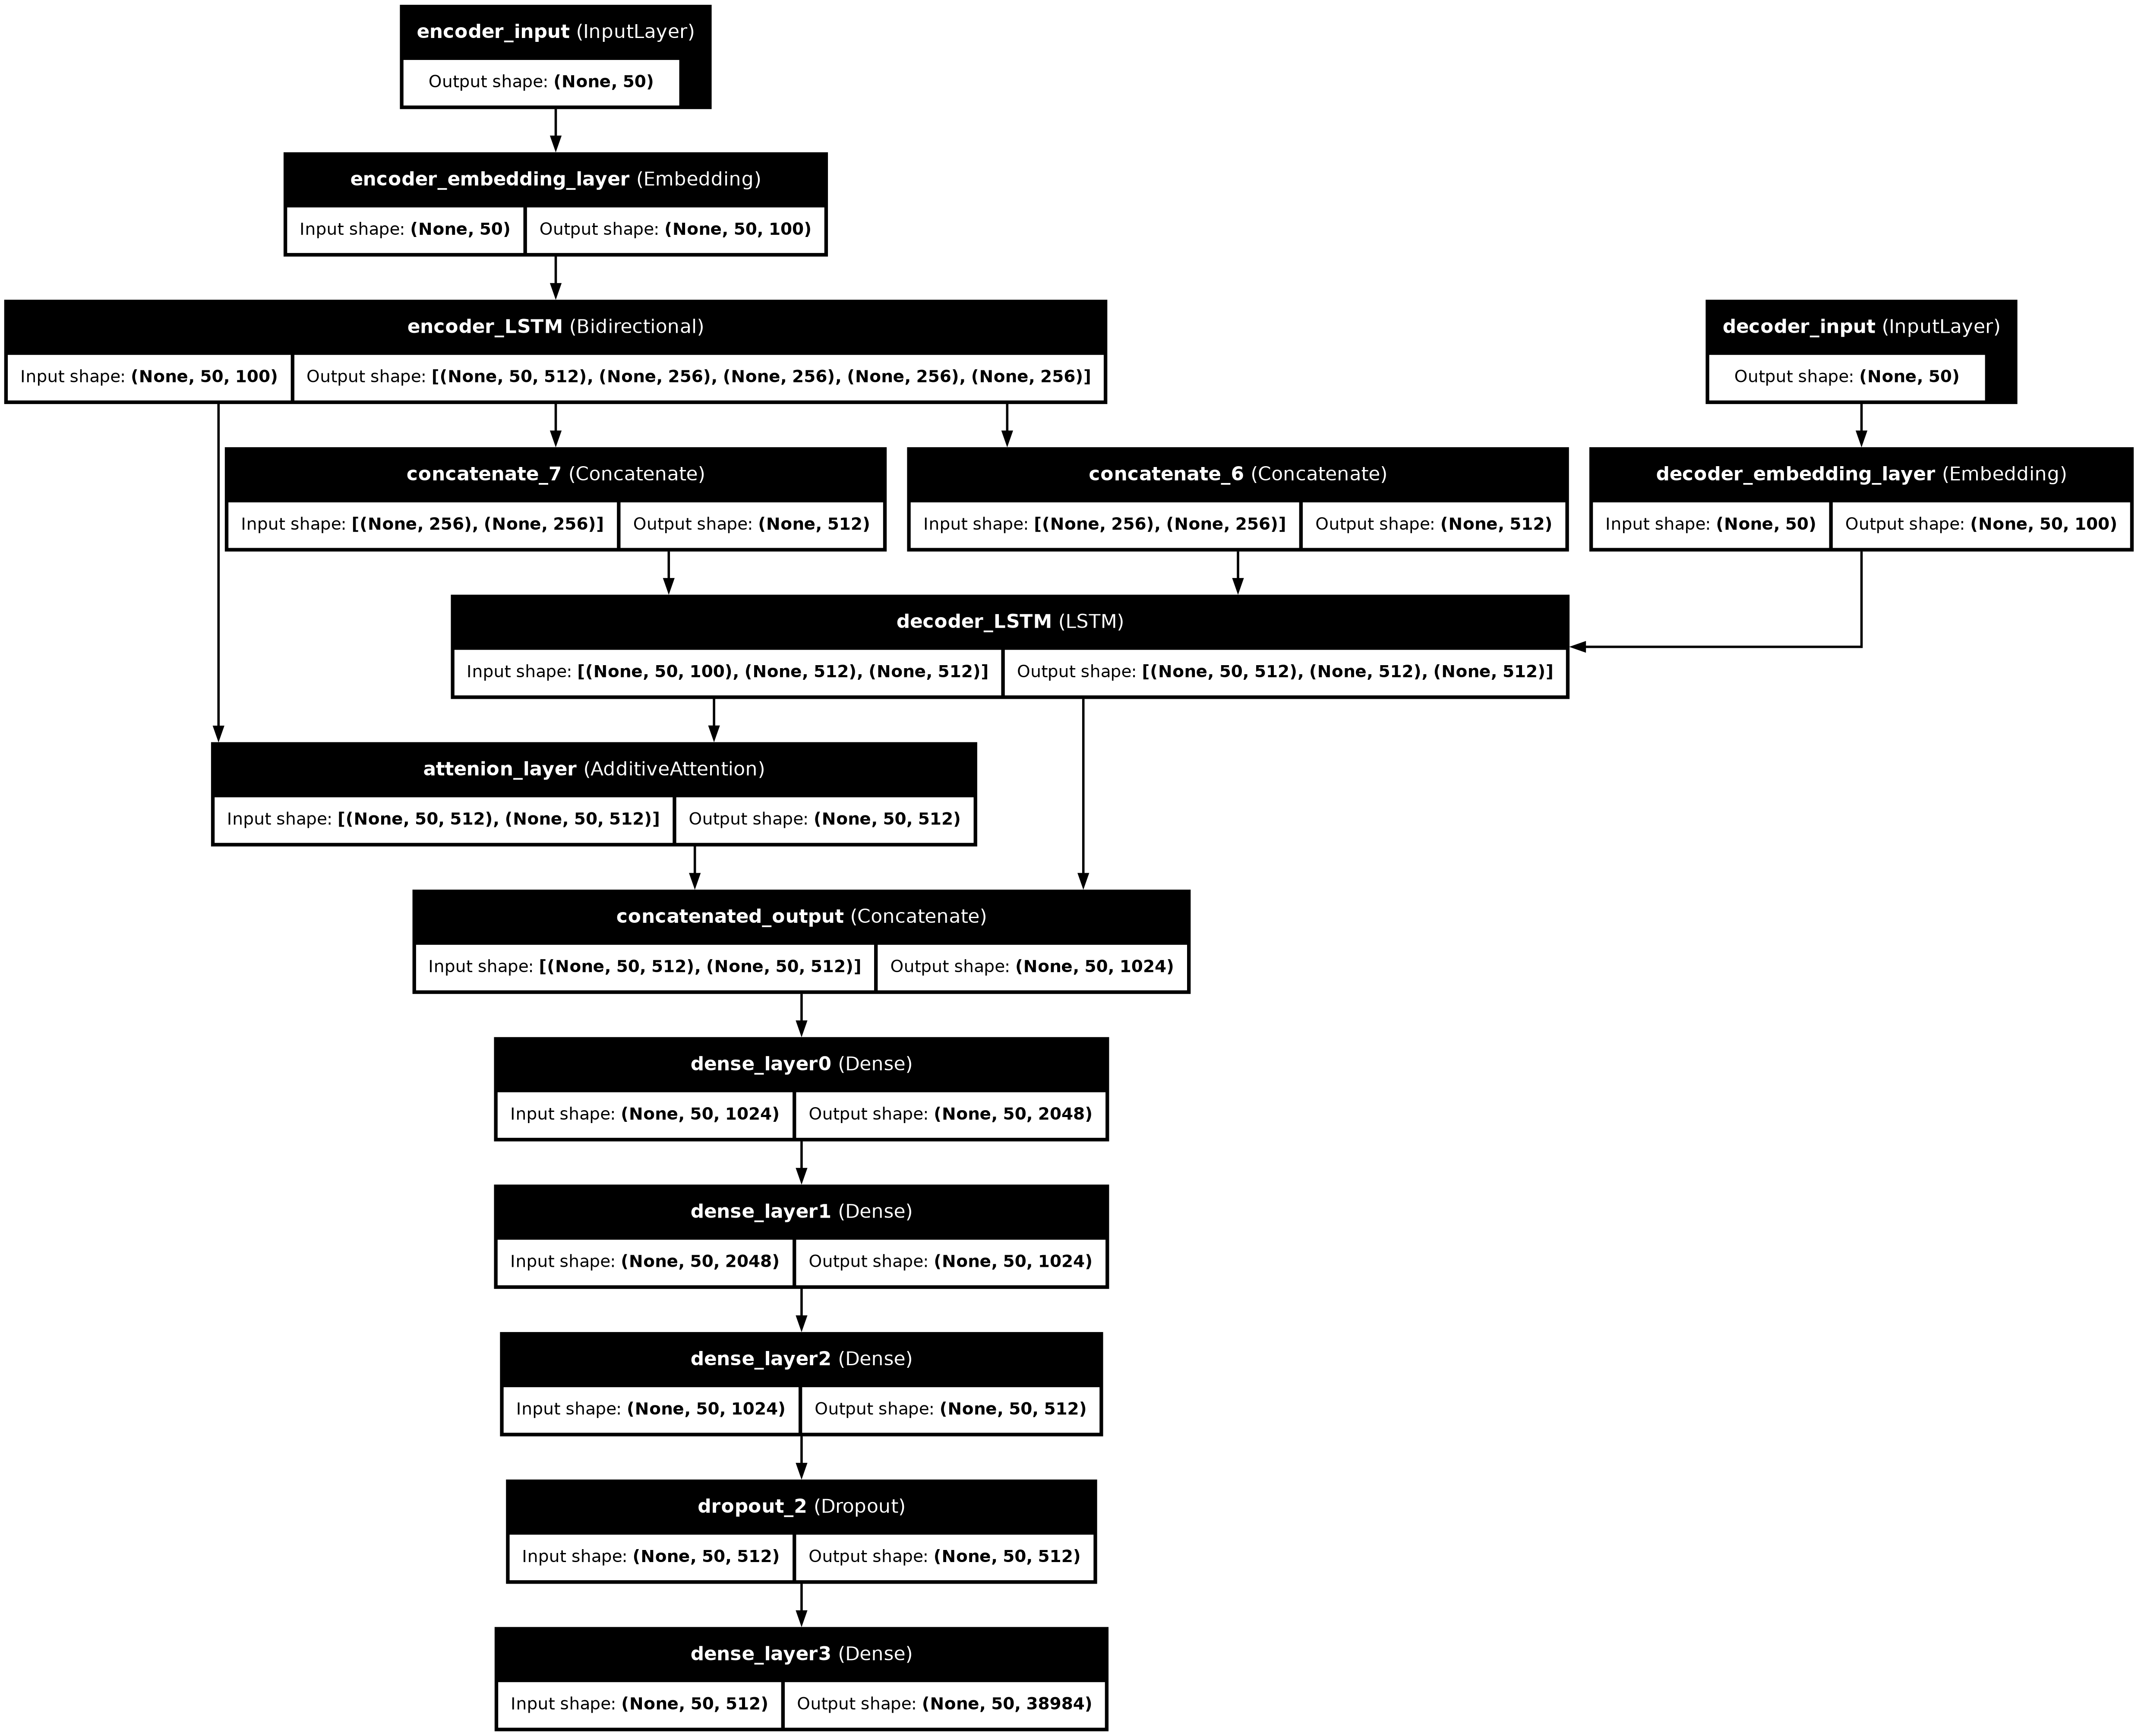

In [66]:

print(model.summary())

model.compile(optimizer='rmsprop', loss ='sparse_categorical_crossentropy', metrics = [MaskedCategoricalAccuracy(empty_token_id_te),ExactMatchedAccuracy(empty_token_id_te)])

plot_model(model, to_file='model_with_Attention_plot.png', show_shapes=True, show_layer_names=True)

In [70]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_output_data,
    epochs=3,
    verbose=0,
    batch_size=64
)

In [71]:
input_h = Input(shape=(hidden_features * 2,),name='input_h')
input_c = Input(shape=(hidden_features * 2,),name='input_c')
encoder_output = Input(shape=(50, hidden_features * 2),name='encoder_output')

(decoder_output,output_h,output_c) = decoder_LSTM(decoder_embeddings,initial_state=[input_h, input_c])
attention_out = attention_layer([decoder_output, encoder_output])
concatenated_output = Concatenate()([decoder_output, attention_out])

de_la_0 = dense_layer0(concatenated_output)
de_la_1 = dense_layer1(de_la_0)
de_la_2 = dense_layer2(de_la_1)
dense_output = dense_layer3(de_la_2)

decoder_model = models.Model([encoder_output, decoder_input, input_h, input_c],[dense_output,output_h, output_c])
decoder_model.summary()

In [68]:
def translate(english_input):
    x_input=np.zeros((1,50) ,dtype=np.int32)
    cleaned_english_input=clean_text(english_input)
    splitted_english_input=cleaned_english_input.split()
    for i in range(50):
      if(i0 and indx!=36034):
        telugu_output=telugu_output+" "+decoder_word_model.wv.index2word[indx]

      telugu_seq = np.zeros((1, 50) ,dtype=np.int32)
      telugu_seq[0,0] = indx

      enc_state_h = dec_state_h
      enc_state_c = dec_state_c

      input_list = [{
        "decoder_input": {
                          "encoder_output": encoder_output,
                          "decoder_input": telugu_seq,
                          "input_h": enc_state_h,
                          "input_c": enc_state_c
        }}]

    return telugu_output


In [74]:
from nltk.translate.bleu_score import sentence_bleu
predicted_docs=[]
actual_docs=[]

for i in range(len(total_training_en)):
  if(len(clean_text(total_training_en[i]).split())>50):
    continue
  telugu=translate(total_training_en[i])

  predicted_docs.append(telugu.split())

print("BLEU SCORE FOR LSTM MODEL   ------> {:.4f}".format(score/len(predicted_docs)))

BLEU SCORE FOR LSTM MODEL   ------> 3.4501


# Muril-Base-Case Model for Translation

In [67]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModel,
    EncoderDecoderModel,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    BertConfig,
    BertModel,
)
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from transformers.modeling_outputs import Seq2SeqLMOutput

encoder_model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(encoder_model_name)
encoder_model = AutoModel.from_pretrained(encoder_model_name)

decoder_config = BertConfig.from_pretrained(encoder_model_name)
decoder_config.is_decoder = True
decoder_config.add_cross_attention = True
decoder_config.decoder_start_token_id = tokenizer.cls_token_id
decoder_config.pad_token_id = tokenizer.pad_token_id
decoder_model = BertModel(decoder_config)

class DecoderWithLMHead(nn.Module):
    def __init__(self, decoder_model, vocab_size):
        super().__init__()
        self.decoder = decoder_model
        self.lm_head = nn.Linear(decoder_model.config.hidden_size, vocab_size)
        self.config = decoder_model.config

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        **kwargs,
    ):
        decoder_outputs = self.decoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            encoder_hidden_states=encoder_hidden_states,
            encoder_attention_mask=encoder_attention_mask,
            return_dict=True,
        )
        logits = self.lm_head(decoder_outputs.last_hidden_state)

        return Seq2SeqLMOutput(
            logits=logits,
            hidden_states=decoder_outputs.hidden_states,
            attentions=decoder_outputs.attentions,
        )

decoder_with_lm_head = DecoderWithLMHead(decoder_model, vocab_size=tokenizer.vocab_size)

model = EncoderDecoderModel(encoder=encoder_model, decoder=decoder_with_lm_head)
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id

source_lang = "en"
target_lang = "te"


train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_dataset = Dataset.from_dict(pd.DataFrame(train_data).to_dict("list"))
val_dataset = Dataset.from_dict(pd.DataFrame(val_data).to_dict("list"))

def preprocess_function(examples):
    inputs = tokenizer(examples[source_lang], max_length=50, truncation=True, padding="max_length")
    targets = tokenizer(examples[target_lang], max_length=50, truncation=True, padding="max_length")
    inputs["labels"] = targets["input_ids"]
    return inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=100,
    fp16=torch.cuda.is_available(),
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

trainer.train()

def translate(text, max_length=50):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=max_length)
    outputs = model.generate(**inputs, max_length=max_length)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

english_text = "Hello, how are you?"
telugu_translation = translate(english_text)
print(f"English: {english_text}")
print(f"Telugu: {telugu_translation}")

English : Hello, how are you?
Telugu : హలో, ఎలా ఉన్నారు


In [ ]:
import torch
from torch import nn
from transformers import (
    AutoTokenizer,
    AutoModel,
    EncoderDecoderModel,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    BertConfig,
    BertModel,
)
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import sacrebleu

# Load MuRIL tokenizer and encoder model
encoder_model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(encoder_model_name)
encoder_model = AutoModel.from_pretrained(encoder_model_name)

decoder_config = BertConfig.from_pretrained(encoder_model_name)
decoder_config.is_decoder = True
decoder_config.add_cross_attention = True
decoder_config.decoder_start_token_id = tokenizer.cls_token_id
decoder_config.pad_token_id = tokenizer.pad_token_id
decoder_model = BertModel(decoder_config)

from transformers.modeling_outputs import CausalLMOutput
import torch.nn as nn

class DecoderWithLMHead(nn.Module):
    def __init__(self, decoder_model, vocab_size):
        super().__init__()
        self.decoder = decoder_model
        self.lm_head = nn.Linear(decoder_model.config.hidden_size, vocab_size)
        self.config = decoder_model.config  # Ensure the config attribute exists

    def forward(
            self,
            input_ids=None,
            attention_mask=None,
            encoder_hidden_states=None,
            encoder_attention_mask=None,
            inputs_embeds=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            **kwargs,
        ):
        
        # Handle inputs based on whether embeddings or input_ids are provided
        if inputs_embeds is not None:
            outputs = self.decoder(
                inputs_embeds=inputs_embeds,
                attention_mask=attention_mask,
                encoder_hidden_states=encoder_hidden_states,
                encoder_attention_mask=encoder_attention_mask,
                output_attentions=output_attentions,
                output_hidden_states=output_hidden_states,
                return_dict=True,
            )
        else:
            outputs = self.decoder(
                input_ids=input_ids,
                attention_mask=attention_mask,
                encoder_hidden_states=encoder_hidden_states,
                encoder_attention_mask=encoder_attention_mask,
                output_attentions=output_attentions,
                output_hidden_states=output_hidden_states,
                return_dict=True,
            )
        
        # Compute logits using the language model head
        logits = self.lm_head(outputs.last_hidden_state)
        
        # Return CausalLMOutput without past_key_values
        return CausalLMOutput(
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions
        )

decoder_with_lm_head = DecoderWithLMHead(decoder_model, vocab_size=tokenizer.vocab_size)

# Combine encoder and decoder into an EncoderDecoderModel
model = EncoderDecoderModel(encoder=encoder_model, decoder=decoder_with_lm_head)
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    sample_weight_mode="temporal"  # Ensures padding is ignored
)
# Load and preprocess dataset
def load_translation_dataset(file_path, source_lang, target_lang):
    data = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split("++++$++++")
            if len(parts) == 2:
                source, target = parts
                data.append({source_lang: source, target_lang: target})
    data = pd.DataFrame(data)
    data = data.sample(frac=0.2)  # Use 20% of the dataset for faster experimentation
    return Dataset.from_pandas(data)

# Specify source and target languages
source_lang = "en"
target_lang = "te"

# Load and preprocess dataset
file_path = dataset_location
dataset = load_translation_dataset(file_path, source_lang, target_lang)

# Split the dataset
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_dataset = Dataset.from_dict(pd.DataFrame(train_dataset).to_dict('list'))
val_dataset = Dataset.from_dict(pd.DataFrame(val_dataset).to_dict('list'))

def preprocess_function(examples):
    inputs = tokenizer(examples[source_lang], max_length=50, truncation=True, padding="max_length")
    targets = tokenizer(examples[target_lang], max_length=50, truncation=True, padding="max_length")
    inputs["labels"] = targets["input_ids"]
    return inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=10,
    save_steps=100,
    fp16=torch.cuda.is_available(),
)

# Initialize Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("muril_translation_model")
tokenizer.save_pretrained("muril_translation_model")

In [78]:
def evaluate_bleu(test_dataset):
    references = []
    hypotheses = []

    for example in test_dataset:
        input_text = example[source_lang]
        reference_text = example[target_lang]

        inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True, max_length=50)
        outputs = model.generate(**inputs, max_length=50)
        hypothesis = tokenizer.decode(outputs[0], skip_special_tokens=True)

        references.append([reference_text])
        hypotheses.append(hypothesis)

    bleu = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu.score

bleu_score = evaluate_bleu(val_dataset)
print(f"BLEU Score: {bleu_score:.4f}")

BLEU Score: 36.3801


# LLAMA model fine-tuning

In [ ]:
from huggingface_hub import login
login(token="")#Removed for safety reasons

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
import torch

# Model ID and tokenizer setup
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"  
)

def tokenize_function(examples):
    prompt = f"Translate the following Telugu text to English:\nTelugu: {examples['source']}\nEnglish:"
    target = f" {examples['target']}"
    
    inputs = tokenizer(prompt + target, truncation=True, padding='max_length', max_length=256)
    inputs["labels"] = inputs["input_ids"].copy()
    
    source_len = len(tokenizer(prompt, add_special_tokens=False)["input_ids"])
    inputs["labels"][:source_len] = [-100] * source_len
    
    return inputs

tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)

tokenized_train = train_dataset.map(tokenize_function, remove_columns=train_dataset.column_names)
tokenized_val = val_dataset.map(tokenize_function, remove_columns=val_dataset.column_names)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2, 
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
    fp16=True,  
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
)

trainer.train()


In [ ]:
def translate(text):
    prompt = f"Translate the following English text to Telugu:\nEnglish: {text}\nTelugu:"
    inputs = loaded_tokenizer(prompt, return_tensors="pt").to(loaded_model.device)
    
    with torch.no_grad():
        outputs = loaded_model.generate(**inputs, max_new_tokens=100)
    
    return loaded_tokenizer.decode(outputs[0], skip_special_tokens=True)

test_text = "What is your name?"
translated_text = translate(test_text)
print(f"English: {test_text}")
print(f"Telugu: {translated_text}")

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name,device='auto')

test_source = test['source'].tolist()
translations = []
for sentence in test_source:
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True)
    outputs = model.generate(inputs["input_ids"], max_length=128)
    translations.append(tokenizer.decode(outputs[0], skip_special_tokens=True))

test['predicted'] = translations


In [ ]:
input_text = "My name is Manoj"
input_text_with_lang = f"teng_Latn {input_text}"

inputs = tokenizer(input_text_with_lang, return_tensors="pt")
outputs = model.generate(inputs['input_ids'], forced_bos_token_id=tokenizer.convert_tokens_to_ids("tel_Telu"))

translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(translated_text)

In [ ]:

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=3,
    push_to_hub=False,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=val,
    tokenizer=tokenizer,
)

trainer.train()

BLEU Score was 39.56

### Was Run on Google Colab

In [90]:
with open("english_telugu_dataset.txt","w",encoding='utf-8') as f:
    src = list(dataset['src'].values)
    tgt = list(dataset['tgt'].values)
    for s,t in zip(src,tgt):
        f.write(f"{s}++++$++++{t}\n")